In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.ndimage import median_filter
from skimage.filters import unsharp_mask
import cv2

import os
os.chdir("../")
from Sources.tools import *

# Load data

In [2]:
preprocess_images = np.load("Data/images_without_label.npy", allow_pickle=True)

In [3]:
images_region_of_interest = get_region_of_interest(preprocess_images)

Removing Pectoral Muscle:   0%|          | 0/322 [00:00<?, ?it/s]c:\Users\planc\anaconda3\envs\env_ovo_project\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\planc\anaconda3\envs\env_ovo_project\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\planc\anaconda3\envs\env_ovo_project\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\planc\anaconda3\envs\env_ovo_project\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\planc\anaconda3\envs\env_ovo_pr

# Apply filters

## CLAHE

In [4]:
def apply_clahe_filter_on_all_images(images_roi):
    filtered_images = []

    for image in tqdm(images_roi, desc="Applying CLAHE filter..."):
        clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(8, 8))
        filtered_image = clahe.apply(image)

        filtered_images += [filtered_image]

    return filtered_images

In [5]:
images_roi_clahe = apply_clahe_filter_on_all_images(images_region_of_interest)
data_clahe = get_features_from_images(images_roi_clahe)

Extracting features ...: 100%|██████████| 322/322 [05:31<00:00,  1.03s/it]


In [6]:
data_clahe.to_csv("Data/Databases/exctracted_features_CLAHE.csv", index=False, sep=";")

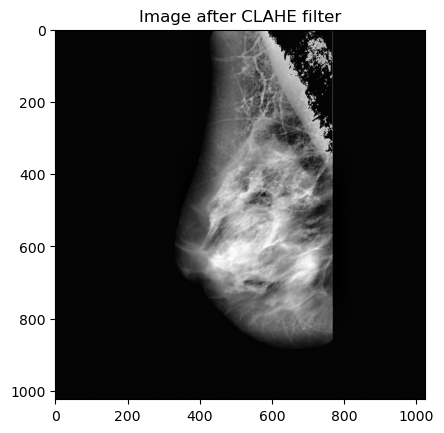

In [7]:
plt.imshow(images_roi_clahe[0], cmap='grey')
plt.title("Image after CLAHE filter")
plt.show()

## MF & CLAHE

In [8]:
def apply_MF_and_CLAHE_on_all_images(images_roi):
    filtered_images = []

    for image in tqdm(images_roi, desc="Applying MF & CLAHE..."):
        # MF
        mf_image = median_filter(image, size=5)

        # CLAHE
        clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(8, 8))
        filtered_image = clahe.apply(mf_image)

        filtered_images += [filtered_image]

    return filtered_images

In [9]:
images_roi_mf_and_clahe = apply_MF_and_CLAHE_on_all_images(images_region_of_interest)
data_mf_and_clahe = get_features_from_images(images_roi_mf_and_clahe)

Extracting features ...: 100%|██████████| 322/322 [04:42<00:00,  1.14it/s]


In [10]:
data_mf_and_clahe.to_csv("Data/Databases/exctracted_features_MF_and_CLAHE.csv", index=False, sep=";")

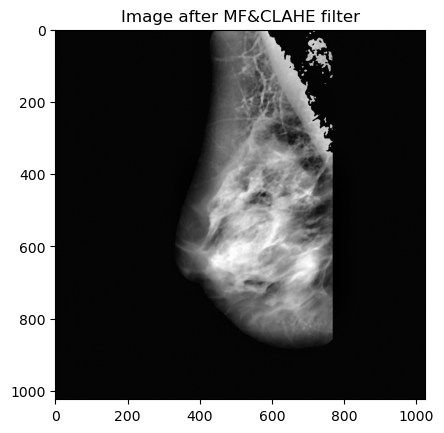

In [11]:
plt.imshow(images_roi_mf_and_clahe[0], cmap='grey')
plt.title("Image after MF&CLAHE filter")
plt.show()

## MF&CLAHE&USM

In [12]:
def apply_MF_and_CLAHE_and_USM_on_all_images(images_roi):
    filtered_images = []

    for image in tqdm(images_roi, desc="Applying MF & CLAHE & USM..."):
        # MF
        mf_image = median_filter(image, size=5)

        # CLAHE
        clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(8, 8))
        clahe_image = clahe.apply(mf_image)

        # USM
        filtered_image = unsharp_mask(clahe_image, radius=2, amount=2)

        filtered_images += [filtered_image]

    return filtered_images

In [13]:
images_roi_mf_and_clahe_and_usm = apply_MF_and_CLAHE_and_USM_on_all_images(images_region_of_interest)
data_mf_and_clahe_and_usm = get_features_from_images(images_roi_mf_and_clahe_and_usm)

Extracting features ...: 100%|██████████| 322/322 [05:10<00:00,  1.04it/s]


In [14]:
data_mf_and_clahe_and_usm.to_csv("Data/Databases/exctracted_features_MF_and_CLAHE_and_USM.csv", index=False, sep=";")

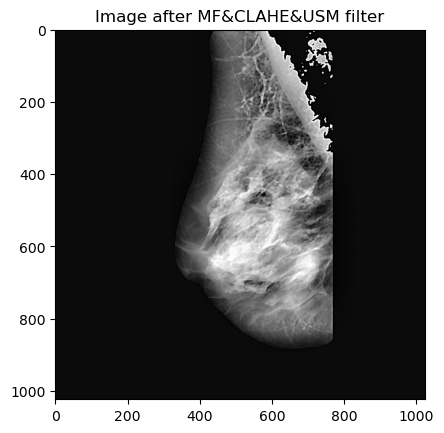

In [15]:
plt.imshow(images_roi_mf_and_clahe_and_usm[0], cmap='grey')
plt.title("Image after MF&CLAHE&USM filter")
plt.show()